                                      Titanic Survival Predictions

In this dataset, we will train a logistic regression model that can predict the survivors of Titanic based on a set of features about the passenger. 
You can find more info about the data and its breakdown in this link https://www.kaggle.com/c/titanic/data

In [23]:
#To generate multiple outputs at the same time 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Let's start by exploring and knowing more about the data.
The data is split into two files. One for training and one for testing. We will load both and find out the number of samples and features in each file.

In [24]:
import pandas as pd
import numpy as np

#Loading the dataset
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

#Number of samples and features
train.shape
# Train dataset has 418 samples with 10 features
test.shape
# Test dataset has 891 samples with 11 features


(891, 12)

(418, 11)

Let's take a look at how many people survived.

In [25]:
(train['Survived']).value_counts()
#there were 342 survivors in the training set

0    549
1    342
Name: Survived, dtype: int64

Let's see if we can find Jack and Rose in the data.
Also, let us see if you can find Beatrice Irene Sandstorm.
You can read here about her https://www.encyclopedia-titanica.org/titanic-survivor/beatrice-irene-sandstrom.html

In [26]:
train[train['Name'].str.contains("Jack")]
train[train['Name'].str.contains("Rose")]

test[test['Name'].str.contains("Jack")]
test[test['Name'].str.contains("Rose")]

#Looks like there are lot of persons under the middle name and last name as Jack and Rose.
#But we can't find actual Jack and Rose in the data. 

train[train['Name'].str.contains("Sand")]
test[test['Name'].str.contains("Sand")]
#Yes we can find Beatrice Irene Sandstorm in the test data.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
208,1100,1,"Rosenbaum, Miss. Edith Louise",female,33.0,0,0,PC 17613,27.7208,A11,C
327,1219,1,"Rosenshine, Mr. George (Mr George Thorne"")""",male,46.0,0,0,PC 17585,79.2000,NaN,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7,G6,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7,G6,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
117,1009,3,"Sandstrom, Miss. Beatrice Irene",female,1.0,1,1,PP 9549,16.7,G6,S


Now let's explore the survival rate based on different factors
In the training dataset, let's calculate the survival rate per class (Pclass- higher class (class 1) meant more expensive and other classes considered less paid)
let's go deep and calculate the survival rate of women, survival rate based on number of siblings and number of parents/children the passengers had on the ship

In [27]:
#survival rate for classes
pclass=train.groupby('Pclass')
pclass['Survived'].value_counts()
values=pclass['Survived'].value_counts().tolist()
print("survival rate for class 1" ,values[0]/(values[0]+values[1]))
print("survival rate for class 2" ,values[3]/(values[3]+values[2]))
print("survival rate for class 3" ,values[5]/(values[5]+values[4]))

#survival rate for women
sex=train.groupby('Sex')
sex['Survived'].value_counts()
values1=sex['Survived'].value_counts().tolist()
print("survival rate for women" ,values1[0]/(values1[0]+values1[1]))

#survival rate based on number of siblings
sibch=train.groupby('SibSp')
sibch['Survived'].value_counts()
values3=sibch['Survived'].value_counts().tolist()
print("survival rate with siblings 0" ,values3[1]/(values3[0]+values3[1]))
print("survival rate with siblings 1" ,values3[2]/(values3[2]+values3[3]))
print("survival rate with siblings 2" ,values3[5]/(values3[4]+values3[5]))
print("survival rate with siblings 3" ,values3[7]/(values3[6]+values3[7]))
print("survival rate with siblings 4" ,values3[9]/(values3[8]+values3[9]))
print("survival rate with siblings 5" ,0/(0+values3[10]))
print("survival rate with siblings 8" ,0/(0+values3[11]))

#survival rate based on number of parents children
Parch=train.groupby('Parch')
Parch['Survived'].value_counts()
values4=Parch['Survived'].value_counts().tolist()
print("survival rate with children 0" ,values4[1]/(values4[0]+values4[1]))
print("survival rate with children 1" ,values4[2]/(values4[2]+values4[3]))
print("survival rate with children 2" ,values4[5]/(values4[4]+values4[5]))
print("survival rate with children 3" ,values4[6]/(values4[6]+values4[7]))
print("survival rate with children 4" ,0/(values4[8]+0))
print("survival rate with children 5" ,values4[10]/(values4[9]+values4[10]))
print("survival rate with children 6" ,0/(values4[11]+0))


Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

survival rate for class 1 0.6296296296296297
survival rate for class 2 0.47282608695652173
survival rate for class 3 0.24236252545824846


Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

survival rate for women 0.7420382165605095


SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

survival rate with siblings 0 0.34539473684210525
survival rate with siblings 1 0.5358851674641149
survival rate with siblings 2 0.4642857142857143
survival rate with siblings 3 0.25
survival rate with siblings 4 0.16666666666666666
survival rate with siblings 5 0.0
survival rate with siblings 8 0.0


Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

survival rate with children 0 0.34365781710914456
survival rate with children 1 0.5508474576271186
survival rate with children 2 0.5
survival rate with children 3 0.6
survival rate with children 4 0.0
survival rate with children 5 0.2
survival rate with children 6 0.0


Now let's visualize the data. Let us plot two histogram based on the age, one for the survivors and other for non survivors. 

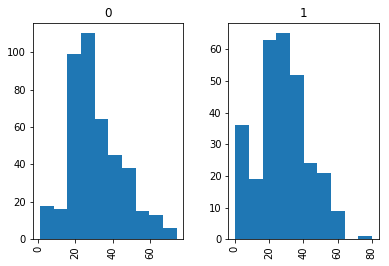

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

survivor = train.hist(column="Age",by="Survived")

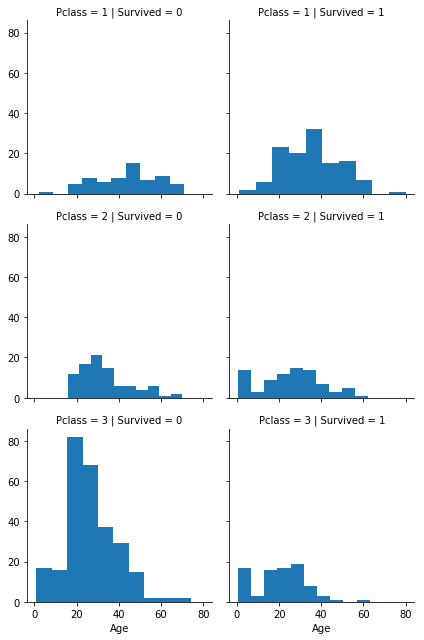

In [29]:
import seaborn as sb

pc= sb.FacetGrid(train, col='Survived', row='Pclass')
pc.map(plt.hist, "Age")
plt.show()

Now let us take a look at the training data and find the missing values and try to fix them.

In [30]:
train.isnull().any()
# Age, Cabin and Embarked contains missing values

train.isnull().sum()
# Age contains 177 missing values
# Cabin contains 687 missing values
# Embarked contains 2 missing values

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can eliminate the nulls by finding out the age median grouped by PClass and gender. Then, we can clean up the data by substituting the nans by the median from the corresponding PClass and gender

In [31]:
train.groupby(['Pclass','Sex']).median()

PassengerId  Survived   Age  SibSp  Parch      Fare
Pclass Sex                                                        
1      female        447.0       1.0  35.0    0.0    0.0  82.66455
       male          480.5       0.0  40.0    0.0    0.0  41.26250
2      female        439.5       1.0  28.0    0.0    0.0  22.00000
       male          416.5       0.0  30.0    0.0    0.0  13.00000
3      female        376.0       0.5  21.5    0.0    0.0  12.47500
       male          466.0       0.0  25.0    0.0    0.0   7.92500

In [32]:
#Cleaning up and substituting

no1=train.loc[(train['Pclass']==1) & (train['Sex']== 'female')]
Age1=no1['Age'].fillna(35.0)
no1['Age']=Age1.values
no1

no2=train.loc[(train['Pclass']==1) & (train['Sex']== 'male')]
Age2=no2['Age'].fillna(40.0)
no2['Age']=Age2.values
no2

no3=train.loc[(train['Pclass']==2) & (train['Sex']== 'female')]
Age3=no3['Age'].fillna(28.0)
no3['Age']=Age3.values
no3

no4=train.loc[(train['Pclass']==2) & (train['Sex']== 'male')]
Age4=no4['Age'].fillna(30.0)
no4['Age']=Age4.values
no4

no5=train.loc[(train['Pclass']==3) & (train['Sex']== 'female')]
Age5=no5['Age'].fillna(21.5)
no5['Age']=Age5.values
no5

no6=train.loc[(train['Pclass']==3) & (train['Sex']== 'male')]
Age6=no6['Age'].fillna(25.0)
no6['Age']=Age6.values
no6

frame=[no1,no2,no3,no4,no5,no6]

dframe=pd.concat(frame)

C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,35.0,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,35.0,0,1,113505,55.0000,E33,S


C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
55,56,1,1,"Woolner, Mr. Hugh",male,40.0,0,0,19947,35.5000,C52,S
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
64,65,0,1,"Stewart, Mr. Albert A",male,40.0,0,0,PC 17605,27.7208,NaN,C


C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,30.00,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.00,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.00,0,0,C.A. 33111,10.5000,NaN,S
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.00,0,0,S.O.C. 14879,73.5000,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
99,100,0,2,"Kantor, Mr. Sinai",male,34.00,1,0,244367,26.0000,NaN,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.00,1,0,11668,21.0000,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.00,2,0,S.O.C. 14879,73.5000,NaN,S


C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,21.5,0,0,2649,7.2250,NaN,C
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,21.5,0,0,330959,7.8792,NaN,Q


C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
26,27,0,3,"Emir, Mr. Farred Chehab",male,25.0,0,0,2631,7.2250,NaN,C
29,30,0,3,"Todoroff, Mr. Lalio",male,25.0,0,0,349216,7.8958,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,25.0,0,0,2677,7.2292,NaN,C


For the Embarked column let us substitute the missing value with the highest occurance value among the entire dataset

In [33]:
dframe['Embarked'].value_counts().argmax()
embarked=dframe['Embarked'].fillna('S')
dframe['Embarked']=embarked.values
dframe

C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


'S'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,35.0,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,35.0,0,1,113505,55.0000,E33,S


Now let us create our model. Cabin, Name, ticket and Passenger Id are not important to our ML model so let's get rid of them

In [34]:
df_train=dframe.drop(["Name","Ticket","PassengerId","Cabin"],axis="columns")
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
11,1,1,female,58.0,0,0,26.5500,S
31,1,1,female,35.0,1,0,146.5208,C
52,1,1,female,49.0,1,0,76.7292,C
61,1,1,female,38.0,0,0,80.0000,S
88,1,1,female,23.0,3,2,263.0000,S
136,1,1,female,19.0,0,2,26.2833,S
151,1,1,female,22.0,1,0,66.6000,S
166,1,1,female,35.0,0,1,55.0000,S


Let us check is our data has nulls or not

In [35]:
df_train.isnull().any().any()

False

Now we need to convert some of our features to categories and numbers instead of letters as logistic regression model won't be able to decode them. Let us map the embarked variable into 0,1, and 2 and the sex variable into 0 and 1

In [36]:
emb=df_train['Embarked'].astype('category').cat.codes
se=df_train['Sex'].astype('category').cat.codes

df_train['Embarked']=emb.values
df_train['Sex']=se.values
df_train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0,38.0,1,0,71.2833,0
3,1,1,0,35.0,1,0,53.1000,2
11,1,1,0,58.0,0,0,26.5500,2
31,1,1,0,35.0,1,0,146.5208,0
52,1,1,0,49.0,1,0,76.7292,0
61,1,1,0,38.0,0,0,80.0000,2
88,1,1,0,23.0,3,2,263.0000,2
136,1,1,0,19.0,0,2,26.2833,2
151,1,1,0,22.0,1,0,66.6000,2
166,1,1,0,35.0,0,1,55.0000,2


Now let's build a logistic regression model and fit it 

In [37]:
X = df_train.loc[:, df_train.columns != 'Survived']
y = df_train['Survived']

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X, y)

logreg.intercept_
logreg.coef_



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

array([4.0936783])

array([[-0.87746191, -2.45961755, -0.03038363, -0.30715021, -0.07641493,
         0.00453882, -0.12066922]])

In [38]:
train_score = logreg.score(X, y)
print('Training accuracy is ', train_score)

Training accuracy is  0.8047138047138047


To see which feature is important let us plot a histogram.

<BarContainer object of 7 artists>

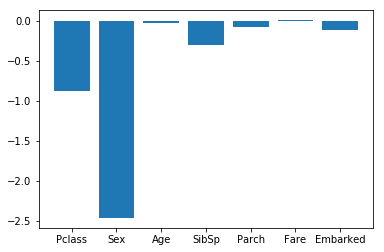

In [39]:
plt.bar(list(X),logreg.coef_[0])
#from the above plot we can say that sex has a very high negative value and therefore it is considered as important.

Now using the same logistic regression model on the test data let's predict who will survive. We need to do the same cleaning using the test data in order to perform logistic regression.

In [40]:
test1=test.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns')
emba=test1['Embarked'].astype('category').cat.codes
se1=test1['Sex'].astype('category').cat.codes

test1['Embarked']=emba.values
test1['Sex']=se1.values

test1.isnull().any()
#Age and Fare have nulls so we need to get rid of those values.

test1.groupby(['Pclass','Sex']).median()


Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Embarked    False
dtype: bool

Age  SibSp  Parch      Fare  Embarked
Pclass Sex                                        
1      0    41.0      0      0  79.02500         0
       1    42.0      0      0  51.86250         2
2      0    24.0      0      0  26.00000         2
       1    28.0      0      0  13.00000         2
3      0    22.0      0      0   8.08125         2
       1    24.0      0      0   7.89580         2

In [41]:
#removing nulls for age

noa=test1.loc[(test1['Pclass']==1) & (test1['Sex']==0)]
Agea=noa['Age'].fillna(41.0)
noa['Age']=Agea.values
noa

nob=test1.loc[(test1['Pclass']==1) & (test1['Sex']==1)]
Ageb=nob['Age'].fillna(42.0)
nob['Age']=Ageb.values
nob

noc=test1.loc[(test1['Pclass']==2) & (test1['Sex']==0)]
Agec=noc['Age'].fillna(24.0)
noc['Age']=Agec.values
noc

nod=test1.loc[(test1['Pclass']==2) & (test1['Sex']==1)]
Aged=nod['Age'].fillna(28.0)
nod['Age']=Aged.values
nod

noe=test1.loc[(test1['Pclass']==3) & (test1['Sex']==0)]
Agee=noe['Age'].fillna(22.0)
noe['Age']=Agee.values
noe

nof=test1.loc[(test1['Pclass']==3) & (test1['Sex']==1)]
Agef=nof['Age'].fillna(24.0)
nof['Age']=Agef.values
nof

ft=[noa,nob,noc,nod,noe,nof]

dft=pd.concat(ft)

C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,0,23.0,1,0,82.2667,2
14,1,0,47.0,1,0,61.1750,2
22,1,0,41.0,0,0,31.6833,2
24,1,0,48.0,1,3,262.3750,0
26,1,0,22.0,0,1,61.9792,0
44,1,0,45.0,1,0,52.5542,2
48,1,0,60.0,0,0,76.2917,0
53,1,0,28.0,3,2,263.0000,2
59,1,0,36.0,0,0,262.3750,0
69,1,0,60.0,1,4,263.0000,2


C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
11,1,1,46.0,0,0,26.0000,2
20,1,1,55.0,1,0,59.4000,0
23,1,1,21.0,0,1,61.3792,0
28,1,1,41.0,0,0,30.5000,2
34,1,1,30.0,1,0,57.7500,0
41,1,1,42.0,0,0,26.5500,2
46,1,1,45.0,0,0,29.7000,0
50,1,1,24.0,1,0,60.0000,2
64,1,1,13.0,2,2,262.3750,0
67,1,1,47.0,0,0,42.4000,2


C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
15,2,0,24.00,1,0,27.7208,0
43,2,0,30.00,0,0,13.0000,2
52,2,0,20.00,2,1,23.0000,2
65,2,0,24.00,0,0,21.0000,2
119,2,0,29.00,1,0,26.0000,2
120,2,0,12.00,0,0,15.7500,2
162,2,0,26.00,0,0,13.5000,2
175,2,0,15.00,0,2,39.0000,2
176,2,0,20.00,0,0,36.7500,2
178,2,0,36.00,0,3,39.0000,2


C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,2,1,62.0,0,0,9.6875,1
7,2,1,26.0,1,1,29.0000,2
13,2,1,63.0,1,0,26.0000,2
16,2,1,35.0,0,0,12.3500,1
30,2,1,50.0,1,0,26.0000,2
31,2,1,24.0,2,0,31.5000,2
51,2,1,27.0,0,0,15.0333,0
54,2,1,28.0,0,0,15.5792,0
61,2,1,32.0,0,0,13.5000,2
78,2,1,30.0,0,0,13.0000,2


C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,3,0,47.00,1,0,7.0000,2
4,3,0,22.00,1,1,12.2875,2
6,3,0,30.00,0,0,7.6292,1
8,3,0,18.00,0,0,7.2292,0
18,3,0,27.00,1,0,7.9250,2
19,3,0,45.00,0,0,7.2250,0
32,3,0,33.00,1,2,20.5750,2
33,3,0,22.00,1,2,23.4500,2
36,3,0,22.00,0,0,8.0500,2
37,3,0,21.00,0,0,8.6625,2


C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
3,3,1,27.0,0,0,8.6625,2
5,3,1,14.0,0,0,9.2250,2
9,3,1,21.0,2,0,24.1500,2
10,3,1,24.0,0,0,7.8958,2
17,3,1,21.0,0,0,7.2250,0
21,3,1,9.0,0,1,3.1708,2
25,3,1,50.0,1,0,14.5000,2
27,3,1,22.5,0,0,7.2250,0
29,3,1,24.0,2,0,21.6792,0


In [42]:
#removing nulls for Fare

nog=dft.loc[(dft['Pclass']==1) & (dft['Sex']==0)]
Fareg=nog['Fare'].fillna(79.02500)
nog['Fare']=Fareg.values
nog

noh=dft.loc[(dft['Pclass']==1) & (dft['Sex']==1)]
Fareh=noh['Fare'].fillna(51.86250)
noh['Fare']=Fareh.values
noh

noi=dft.loc[(dft['Pclass']==2) & (dft['Sex']==0)]
Farei=noi['Fare'].fillna(26.00000)
noi['Fare']=Farei.values
noi

noj=dft.loc[(dft['Pclass']==2) & (dft['Sex']==1)]
Farej=noj['Fare'].fillna(13.00000)
noj['Fare']=Farej.values
noj

nok=dft.loc[(dft['Pclass']==3) & (dft['Sex']==0)]
Farek=nok['Fare'].fillna(8.08125)
nok['Fare']=Farek.values
nok

nol=dft.loc[(dft['Pclass']==3) & (dft['Sex']==1)]
Farel=nof['Fare'].fillna(7.89580)
nol['Fare']=Farel.values
nol

ft1=[nog,noh,noi,noj,nok,nol]

X_test=pd.concat(ft1)

C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,0,23.0,1,0,82.2667,2
14,1,0,47.0,1,0,61.1750,2
22,1,0,41.0,0,0,31.6833,2
24,1,0,48.0,1,3,262.3750,0
26,1,0,22.0,0,1,61.9792,0
44,1,0,45.0,1,0,52.5542,2
48,1,0,60.0,0,0,76.2917,0
53,1,0,28.0,3,2,263.0000,2
59,1,0,36.0,0,0,262.3750,0
69,1,0,60.0,1,4,263.0000,2


C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
11,1,1,46.0,0,0,26.0000,2
20,1,1,55.0,1,0,59.4000,0
23,1,1,21.0,0,1,61.3792,0
28,1,1,41.0,0,0,30.5000,2
34,1,1,30.0,1,0,57.7500,0
41,1,1,42.0,0,0,26.5500,2
46,1,1,45.0,0,0,29.7000,0
50,1,1,24.0,1,0,60.0000,2
64,1,1,13.0,2,2,262.3750,0
67,1,1,47.0,0,0,42.4000,2


C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
15,2,0,24.00,1,0,27.7208,0
43,2,0,30.00,0,0,13.0000,2
52,2,0,20.00,2,1,23.0000,2
65,2,0,24.00,0,0,21.0000,2
119,2,0,29.00,1,0,26.0000,2
120,2,0,12.00,0,0,15.7500,2
162,2,0,26.00,0,0,13.5000,2
175,2,0,15.00,0,2,39.0000,2
176,2,0,20.00,0,0,36.7500,2
178,2,0,36.00,0,3,39.0000,2


C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,2,1,62.0,0,0,9.6875,1
7,2,1,26.0,1,1,29.0000,2
13,2,1,63.0,1,0,26.0000,2
16,2,1,35.0,0,0,12.3500,1
30,2,1,50.0,1,0,26.0000,2
31,2,1,24.0,2,0,31.5000,2
51,2,1,27.0,0,0,15.0333,0
54,2,1,28.0,0,0,15.5792,0
61,2,1,32.0,0,0,13.5000,2
78,2,1,30.0,0,0,13.0000,2


C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,3,0,47.00,1,0,7.0000,2
4,3,0,22.00,1,1,12.2875,2
6,3,0,30.00,0,0,7.6292,1
8,3,0,18.00,0,0,7.2292,0
18,3,0,27.00,1,0,7.9250,2
19,3,0,45.00,0,0,7.2250,0
32,3,0,33.00,1,2,20.5750,2
33,3,0,22.00,1,2,23.4500,2
36,3,0,22.00,0,0,8.0500,2
37,3,0,21.00,0,0,8.6625,2


C:\Users\vickrajkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
3,3,1,27.0,0,0,8.6625,2
5,3,1,14.0,0,0,9.2250,2
9,3,1,21.0,2,0,24.1500,2
10,3,1,24.0,0,0,7.8958,2
17,3,1,21.0,0,0,7.2250,0
21,3,1,9.0,0,1,3.1708,2
25,3,1,50.0,1,0,14.5000,2
27,3,1,22.5,0,0,7.2250,0
29,3,1,24.0,2,0,21.6792,0


In [43]:
# Predicting the survival

predic_t=logreg.predict(X_test)

predic_t

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Let's finally calculate how many will survive.

In [44]:
import collections
collections.Counter(predic_t)

#The test data says that there are 155 survivors 

Counter({1: 155, 0: 263})